In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
f_size=32
mpl.rcParams['xtick.labelsize']=f_size
mpl.rcParams['ytick.labelsize']=f_size
mpl.rcParams['axes.labelweight']='light'
mpl.rcParams['axes.labelsize']=f_size
mpl.rcParams['font.size']=f_size
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Helvetica'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.weight']='light'
mpl.rcParams['figure.dpi']=600
mpl.rcParams['figure.figsize']=(1.0,1.0)
mpl.rcParams['legend.frameon']=False;
mpl.rcParams['figure.autolayout']=True;
mpl.rcParams['xtick.major.size']=10;
mpl.rcParams['xtick.major.width']=1.5
mpl.rcParams['xtick.minor.size']=6;
mpl.rcParams['xtick.minor.width']=1
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.major.width']=1.5
mpl.rcParams['ytick.minor.size']=4;
mpl.rcParams['ytick.minor.width']=1
mpl.rcParams['legend.fontsize']=f_size
mpl.rcParams['text.fontsize'] =f_size
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Helvetica'
colors=['black','Coral','Red','DarkOrange','Brown','Gold','MediumSeaGreen','Green','LightSeaGreen',
       'SteelBlue','Blue','Navy','DarkViolet','DeepPink']

#import mpld3
#mpld3.enable_notebook()
import pandas as pd
import numpy as np

/Users/jimy/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# $MoSe_2$ Bulk Structure

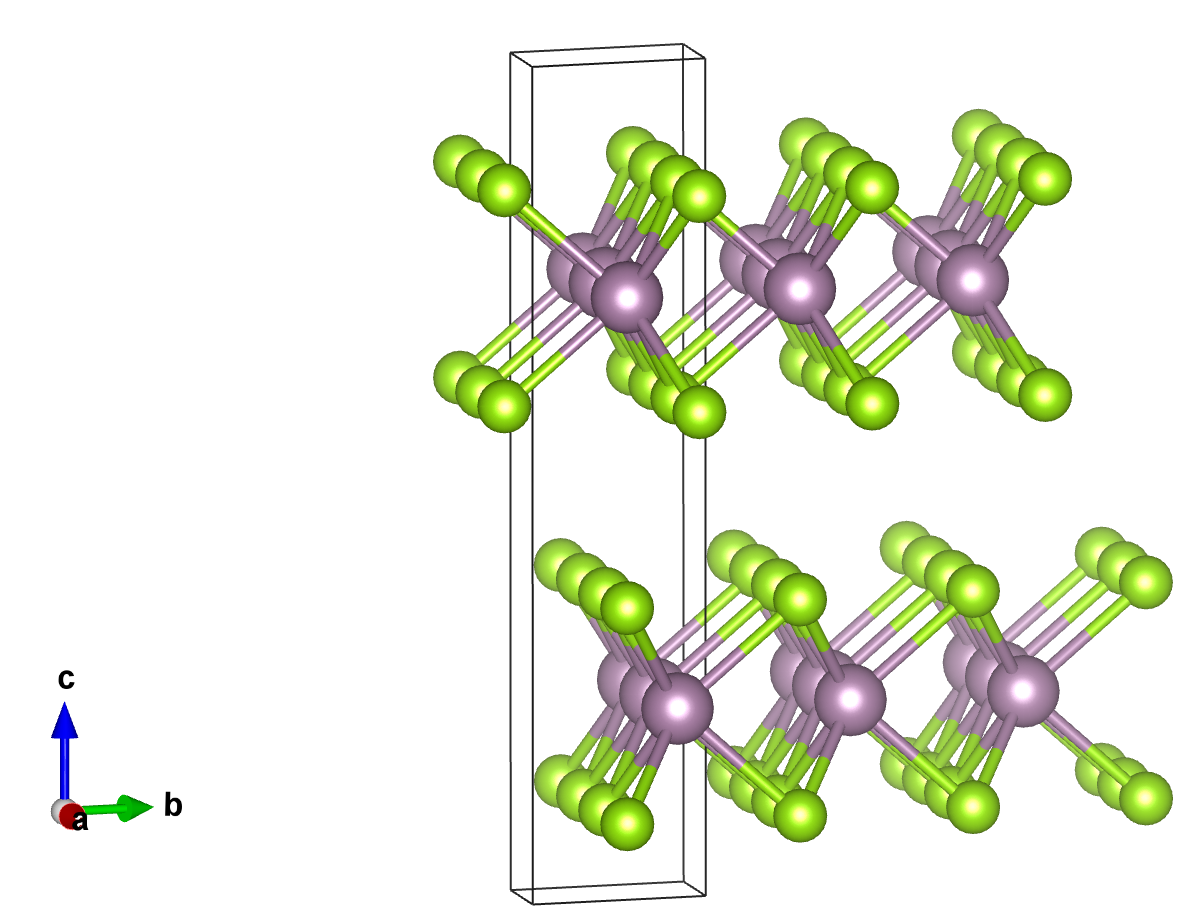

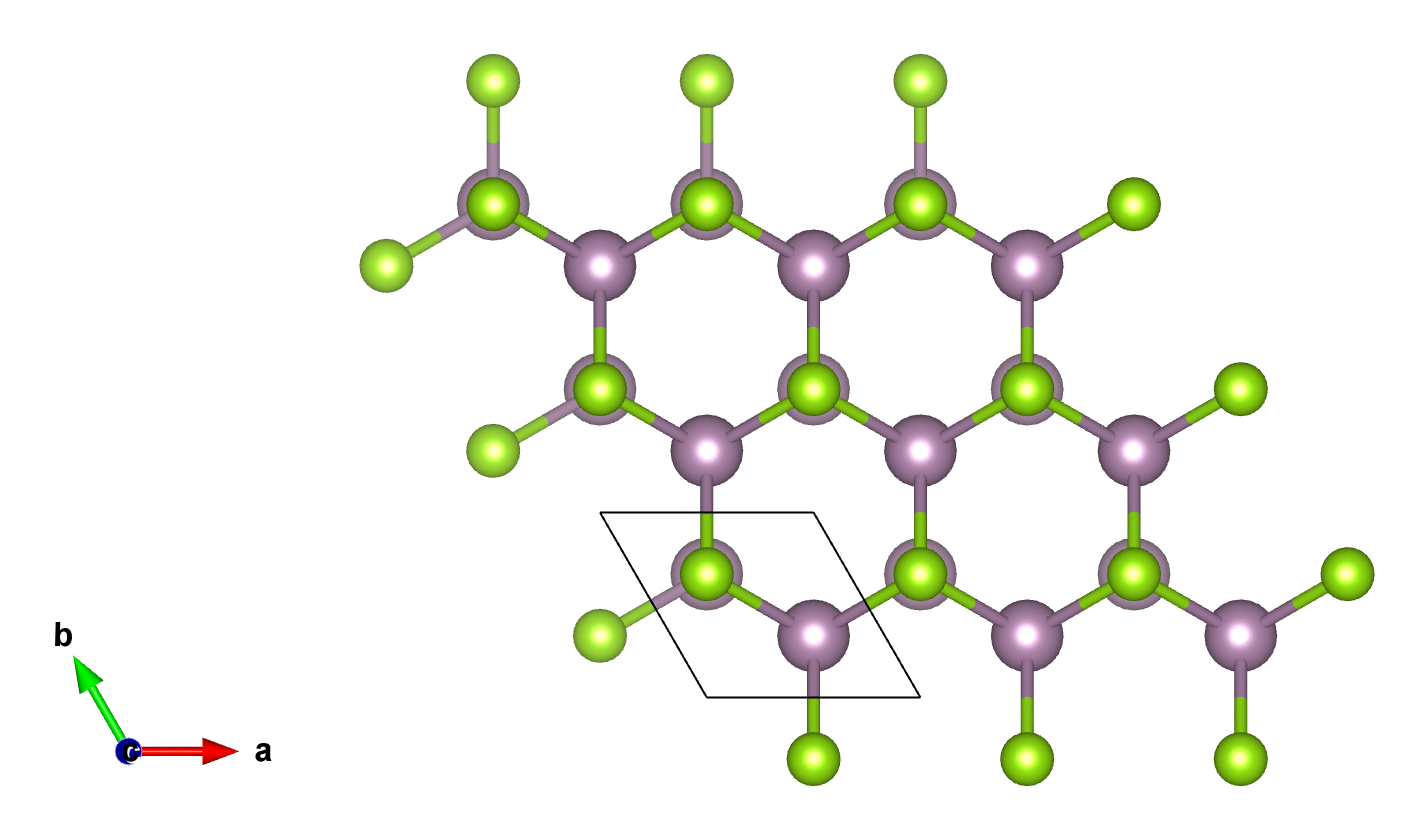

In [4]:
from IPython.display import Image
from IPython.display import display
I1=Image(filename='../../MoSe2/Bulk_MoSe2_a.png',width=500)
I2=Image(filename='../../MoSe2/Bulk_MoSe2_c.png',width=500)
display(I1,I2)

# Energy/Force Convergence: ecutwfc

/Users/jimy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


/Users/jimy/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


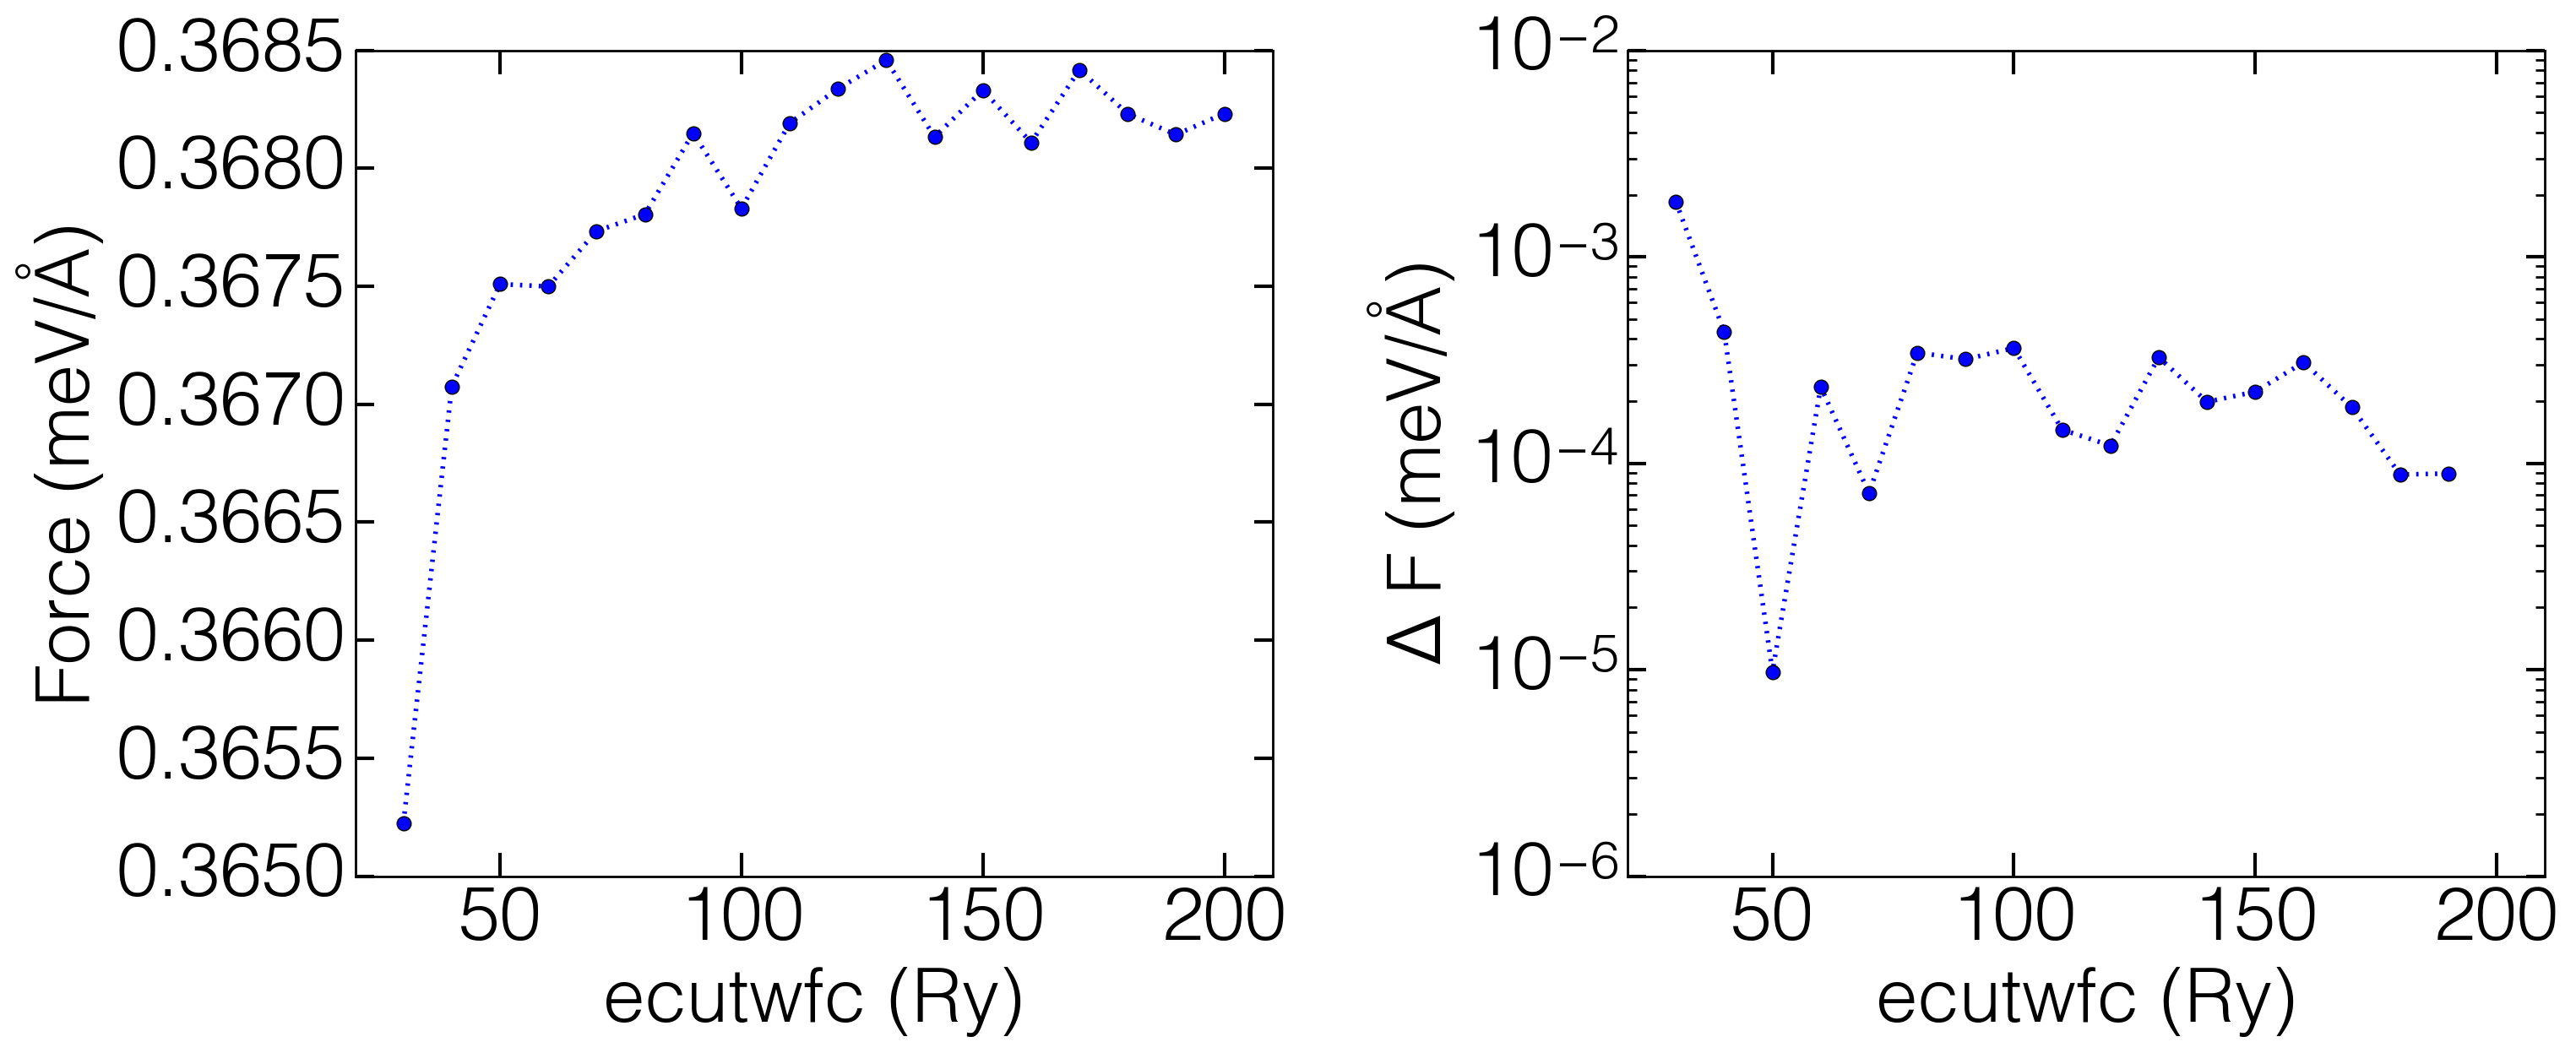

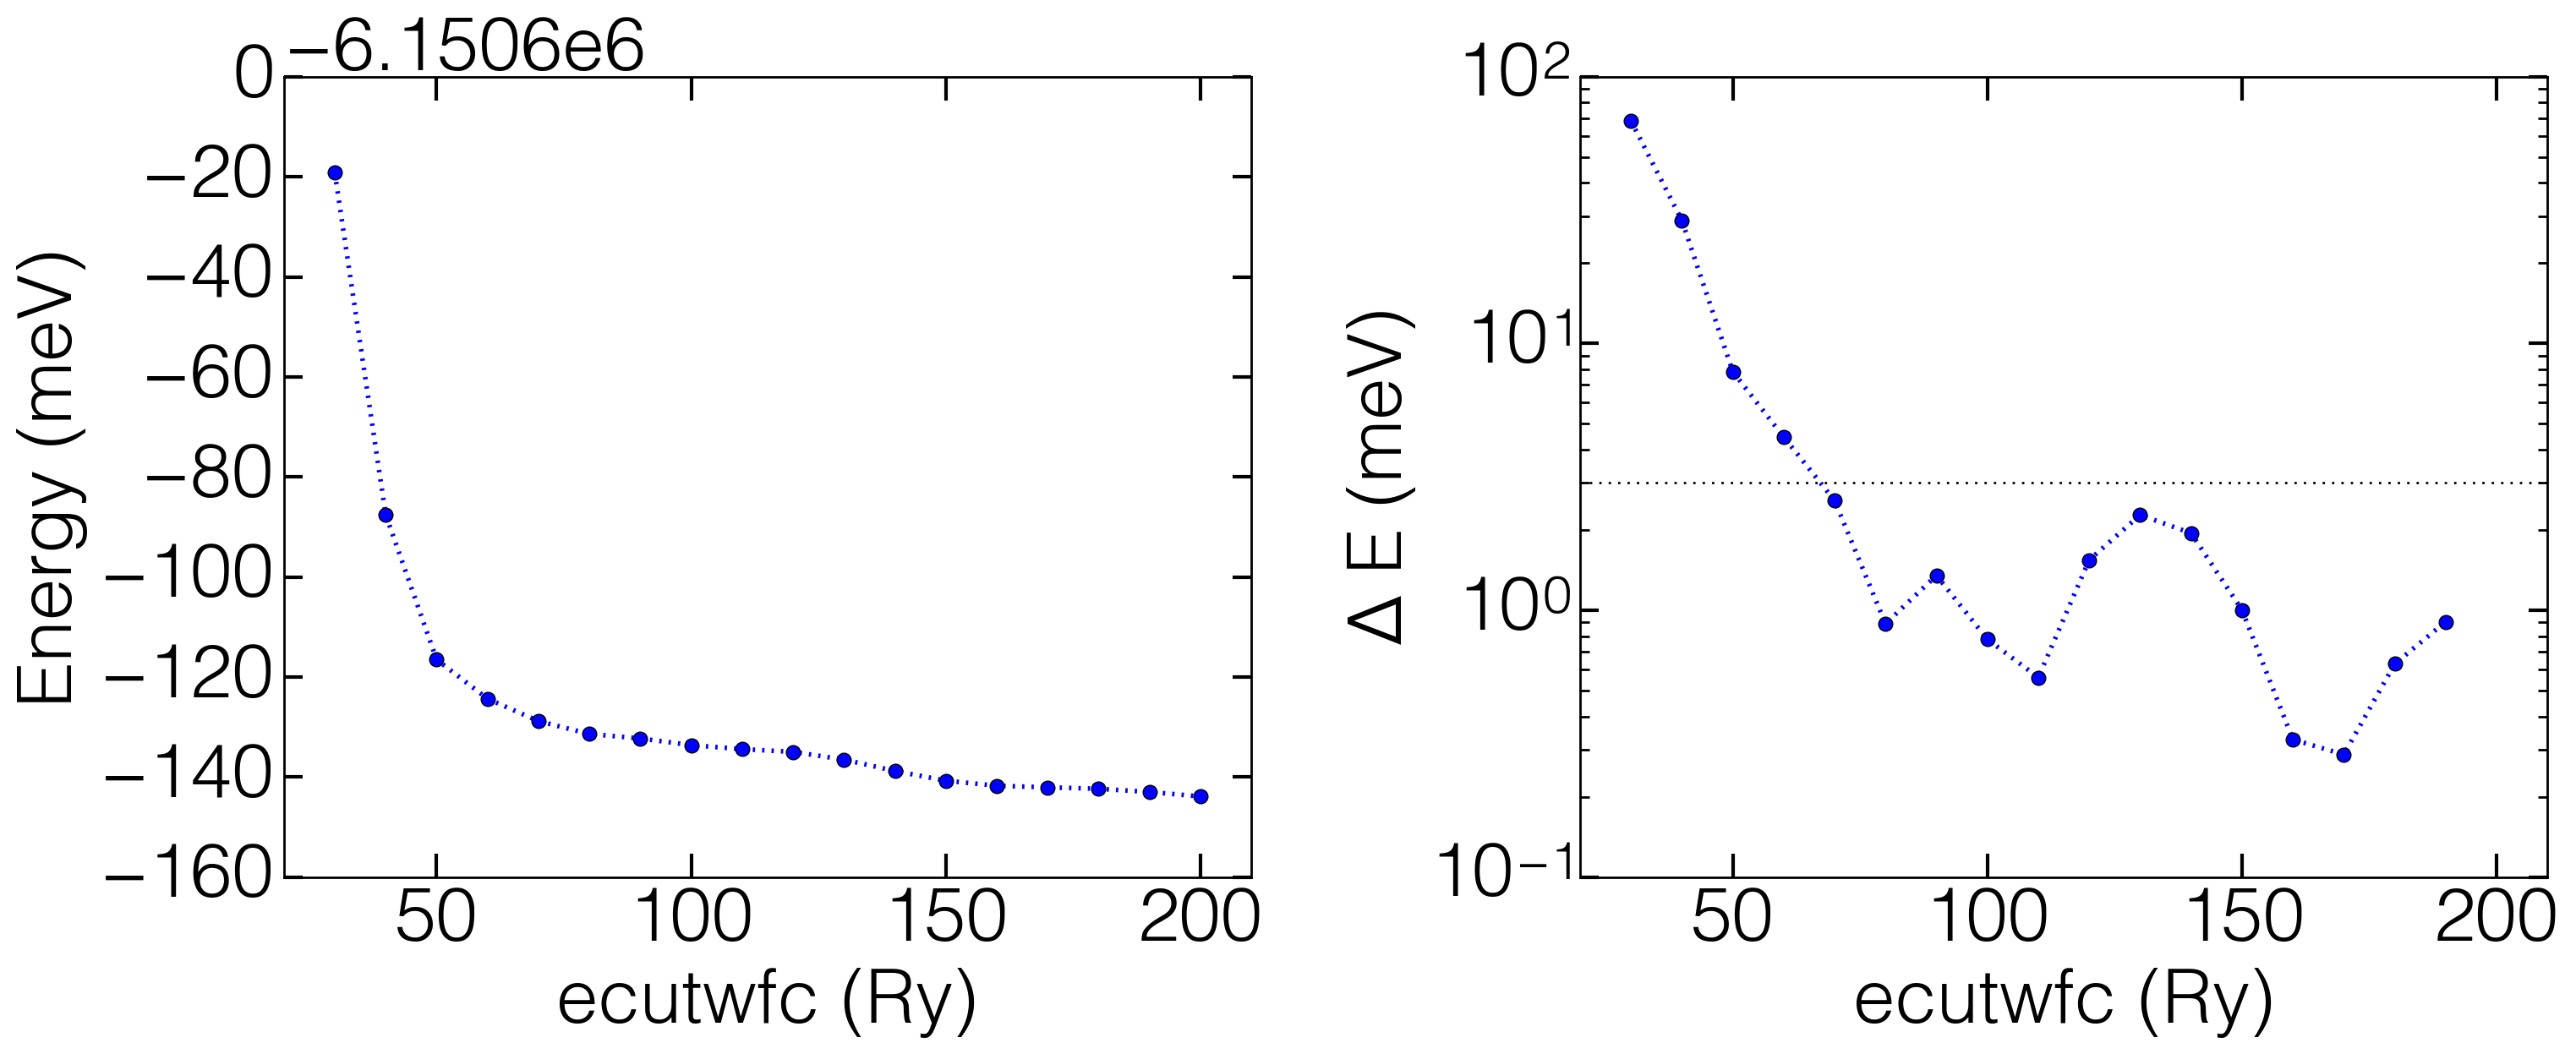

In [20]:
# Convergence Function
def conv(arr):
    arr_conv=arr[1::]-arr[0:-1:]
    arr_conv=np.append(arr_conv,None)
    return arr_conv
# Read data files
path='../../MoSe2/Bulk/Relaxed/relax/'

f_1A='ecut_F_E.txt'
data_1A=pd.read_csv(path+f_1A,delimiter='\t\t',names=['ecutwfc (Ry)','Force (Ry/Bohr)','Energy (Ry)'],skiprows=[0]);

# Convert to Ev-s and AA-s
ry2eV=13.605698
bohr2AA=0.529177
data_1A['Force (meV/Å)']=data_1A['Force (Ry/Bohr)']*ry2eV/bohr2AA
data_1A['Energy (meV)']=data_1A['Energy (Ry)']*ry2eV*10**3

# Convergence
Delta_alat_vec=np.array([])
data_1A['Force_conv']=conv(np.array(data_1A['Force (meV/Å)'].values))
data_1A['Energy_conv']=conv(np.array(data_1A['Energy (meV)'].values))

# Force Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['ecutwfc (Ry)'],data_1A['Force (meV/Å)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([20,210])
ax1.set_xlabel('ecutwfc (Ry)')
ax1.set_ylabel('Force (meV/Å)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['ecutwfc (Ry)'].values[:-1:],abs(data_1A['Force_conv'].values[:-1:]),linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([3.8,3.86])
ax2.set_xlim([20,210])
ax2.set_xlabel('ecutwfc (Ry)')
ax2.set_ylabel(r'$\Delta$ F (meV/Å)')

# Energy Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['ecutwfc (Ry)'],data_1A['Energy (meV)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([20,210])
ax1.set_xlabel('ecutwfc (Ry)')
ax1.set_ylabel('Energy (meV)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['ecutwfc (Ry)'].values[:-1:],abs(data_1A['Energy_conv'].values[:-1:]),linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([3.8,3.86])
ax2.set_xlim([20,210])
ax2.set_xlabel('ecutwfc (Ry)')
ax2.set_ylabel(r'$\Delta$ E (meV)')
ax2.axhline(3,linestyle=':',color='k')

#Table
#print(data_2A.to_latex())
#data_1A
# Chose ecutwfc=60

$\color{red}{\text{ecuwfc = 70}}$

# Energy/Force Convergence: k

/Users/jimy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


/Users/jimy/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


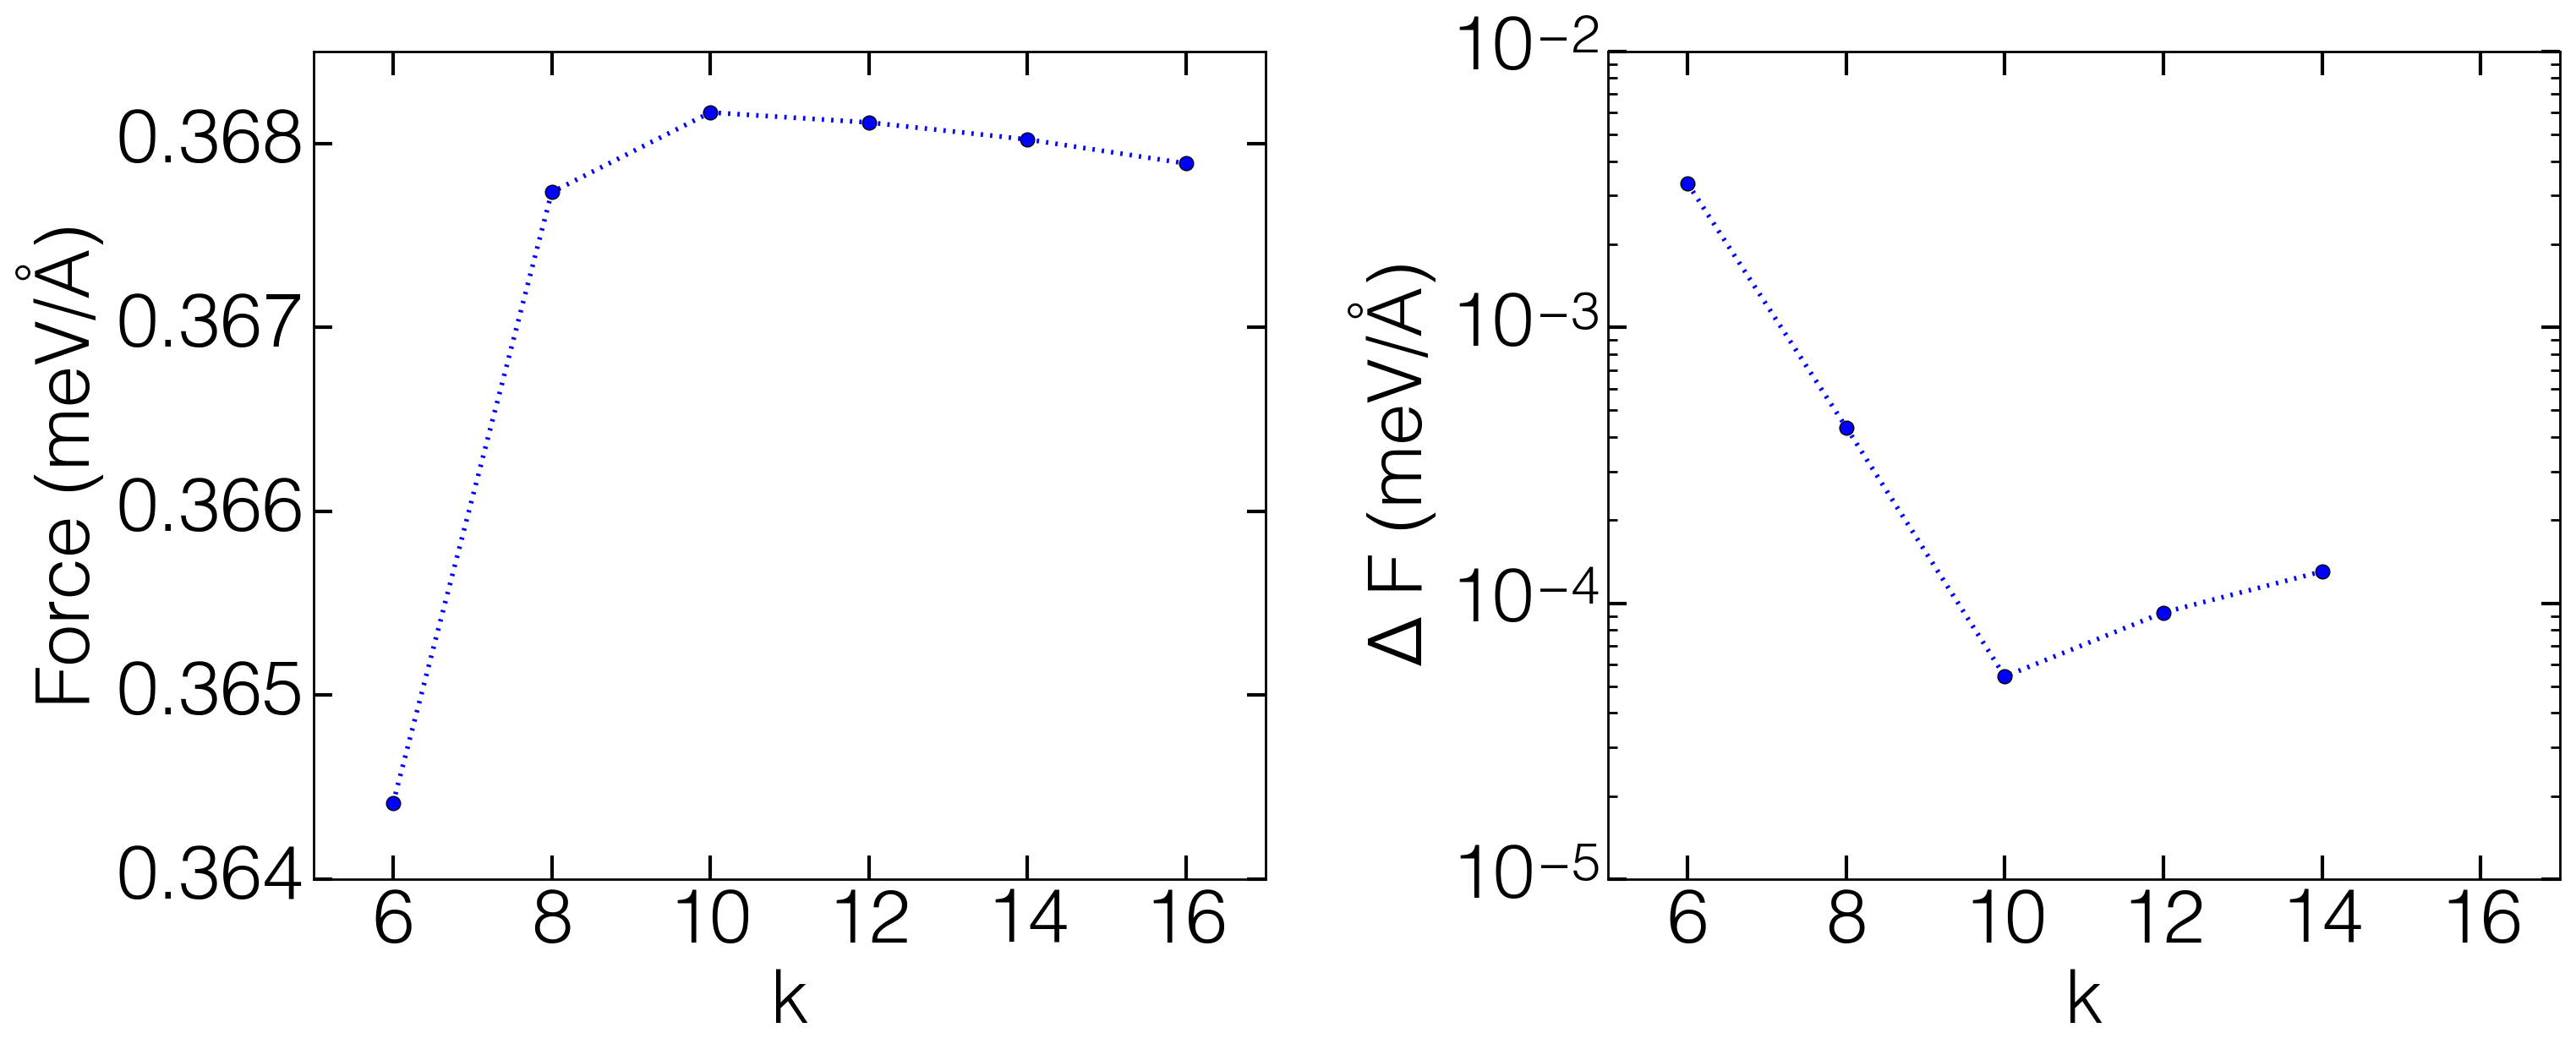

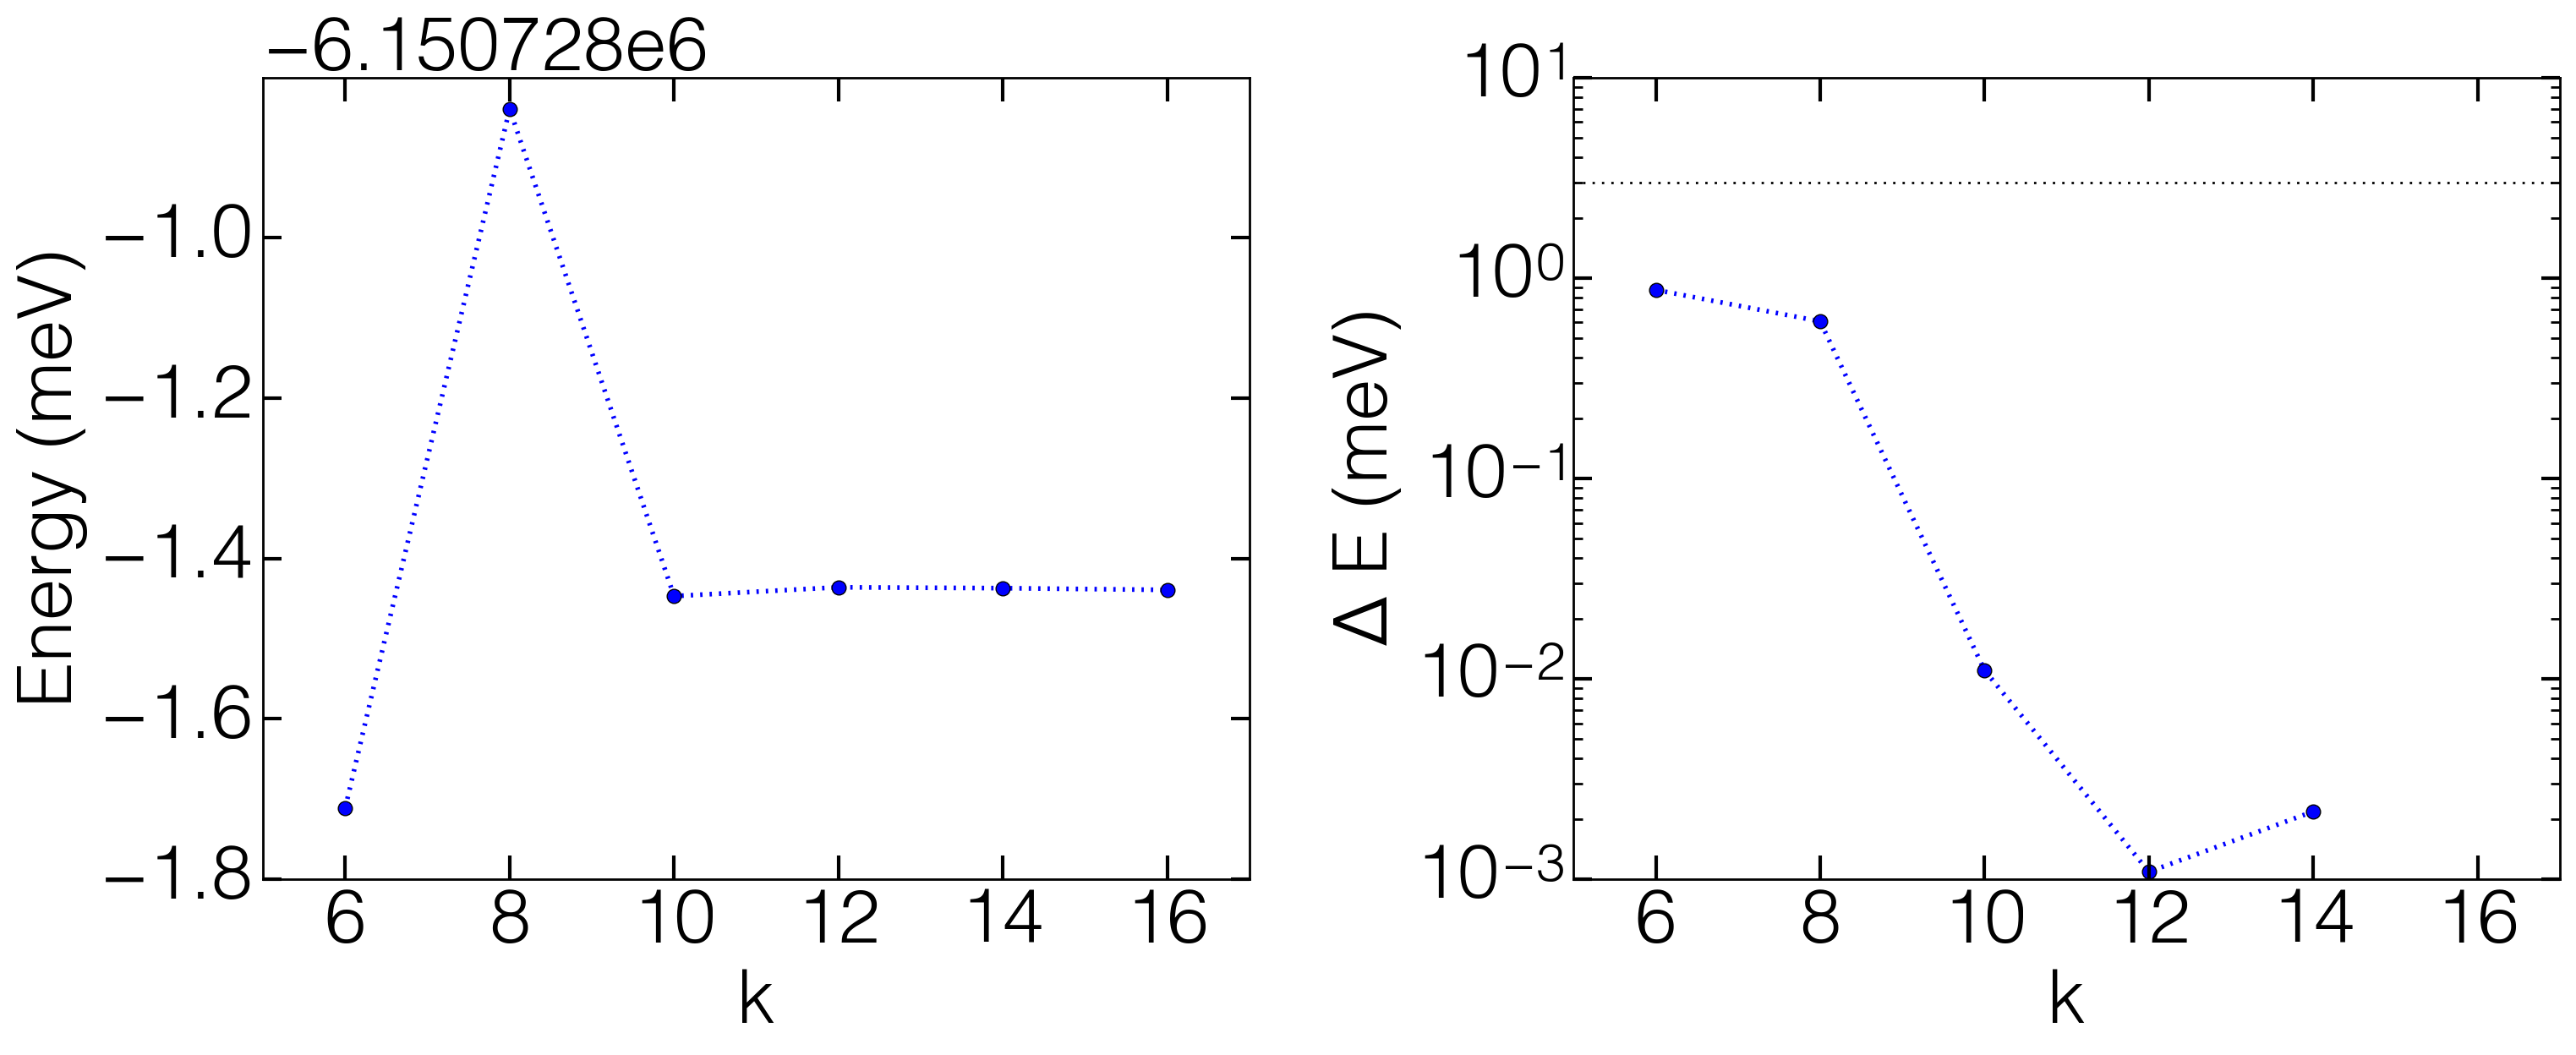

In [25]:
# Convergence Function
def conv(arr):
    arr_conv=arr[1::]-arr[0:-1:]
    arr_conv=np.append(arr_conv,None)
    return arr_conv
# Read data files
path='../../MoSe2/Bulk/Relaxed/relax/'

f_1A='k_F_E.txt'
data_1A=pd.read_csv(path+f_1A,delimiter='\t\t',names=['k','Force (Ry/Bohr)','Energy (Ry)'],skiprows=[0]);

# Convert to Ev-s and AA-s
ry2eV=13.605698
bohr2AA=0.529177
data_1A['Force (meV/Å)']=data_1A['Force (Ry/Bohr)']*ry2eV/bohr2AA
data_1A['Energy (meV)']=data_1A['Energy (Ry)']*ry2eV*10**3

# Convergence
Delta_alat_vec=np.array([])
data_1A['Force_conv']=conv(np.array(data_1A['Force (meV/Å)'].values))
data_1A['Energy_conv']=conv(np.array(data_1A['Energy (meV)'].values))

# Force Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['k'],data_1A['Force (meV/Å)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([5,17])
ax1.set_xlabel('k')
ax1.set_ylabel('Force (meV/Å)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['k'].values[:-1:],abs(data_1A['Force_conv'].values[:-1:]),linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([3.8,3.86])
ax2.set_xlim([5,17])
ax2.set_xlabel('k')
ax2.set_ylabel(r'$\Delta$ F (meV/Å)')

# Energy Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['k'],data_1A['Energy (meV)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([5,17])
ax1.set_xlabel('k')
ax1.set_ylabel('Energy (meV)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['k'].values[:-1:],abs(data_1A['Energy_conv'].values[:-1:]),linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([3.8,3.86])
ax2.set_xlim([5,17])
ax2.set_xlabel('k')
ax2.set_ylabel(r'$\Delta$ E (meV)')
ax2.axhline(3,linestyle=':',color='k')

#Table
#print(data_2A.to_latex())
#data_1A
# Chose ecutwfc=60

$\color{red}{\text{k k k = 10 10 10}}$